In [8]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# scipy for algorithms
import scipy
from scipy import stats

# pymc3 for Bayesian Inference, pymc built on t
import pymc3
import theano.tensor as tt
import scipy
from scipy import optimize

# matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib
plt.style.use("ggplot")

In [9]:
raw_data = pd.read_csv('data/lamp_TTF.csv')
duration = raw_data['Projection Hours']

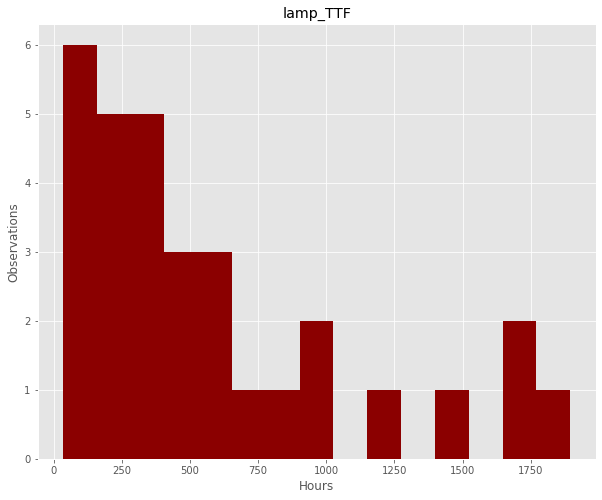

In [10]:
figsize(10, 8)
plt.hist(duration, bins = 15, color = 'darkred')
plt.xlabel('Hours'); plt.title('lamp_TTF'); 
plt.ylabel('Observations');

C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


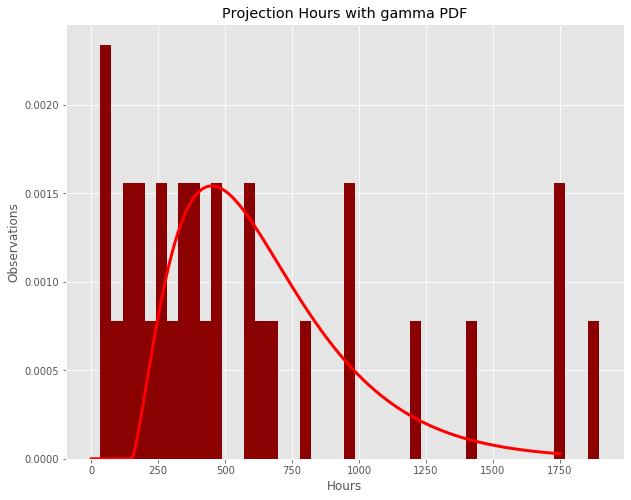

In [11]:
a = 2.5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1750, 2000)

figsize(40, 20)
plt.hist(duration, bins = 45, color = 'darkred', normed=True)
plt.xlabel('Hours'); plt.title('Projection Hours with gamma PDF'); 
plt.ylabel('Observations');
plt.plot(x, stats.gamma.pdf(x, a, loc = 150, scale=200), 'r-', 
         lw=3, label='Gamma pdf');

In [12]:
# Parameter values for prior and analytic posterior
alpha = 2.5
beta = 2350

# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 10000

# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the failure rate lamda using a Gamma distribution
    theta = pymc3.Gamma("theta", alpha=alpha, beta=beta)

    # Define the Exponential likelihood function
    y = pymc3.Exponential("y", lam=theta)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.NUTS()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

logp = -0.49396, ||grad|| = 2.1765e-05: 100%|████████████████████████████████████████| 23/23 [00:00<00:00, 3310.99it/s]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y, theta]
Sampling 4 chains, 4 divergences: 100%|█████████████████████████████████████| 42000/42000 [00:14<00:00, 2902.55draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8833983263807244, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


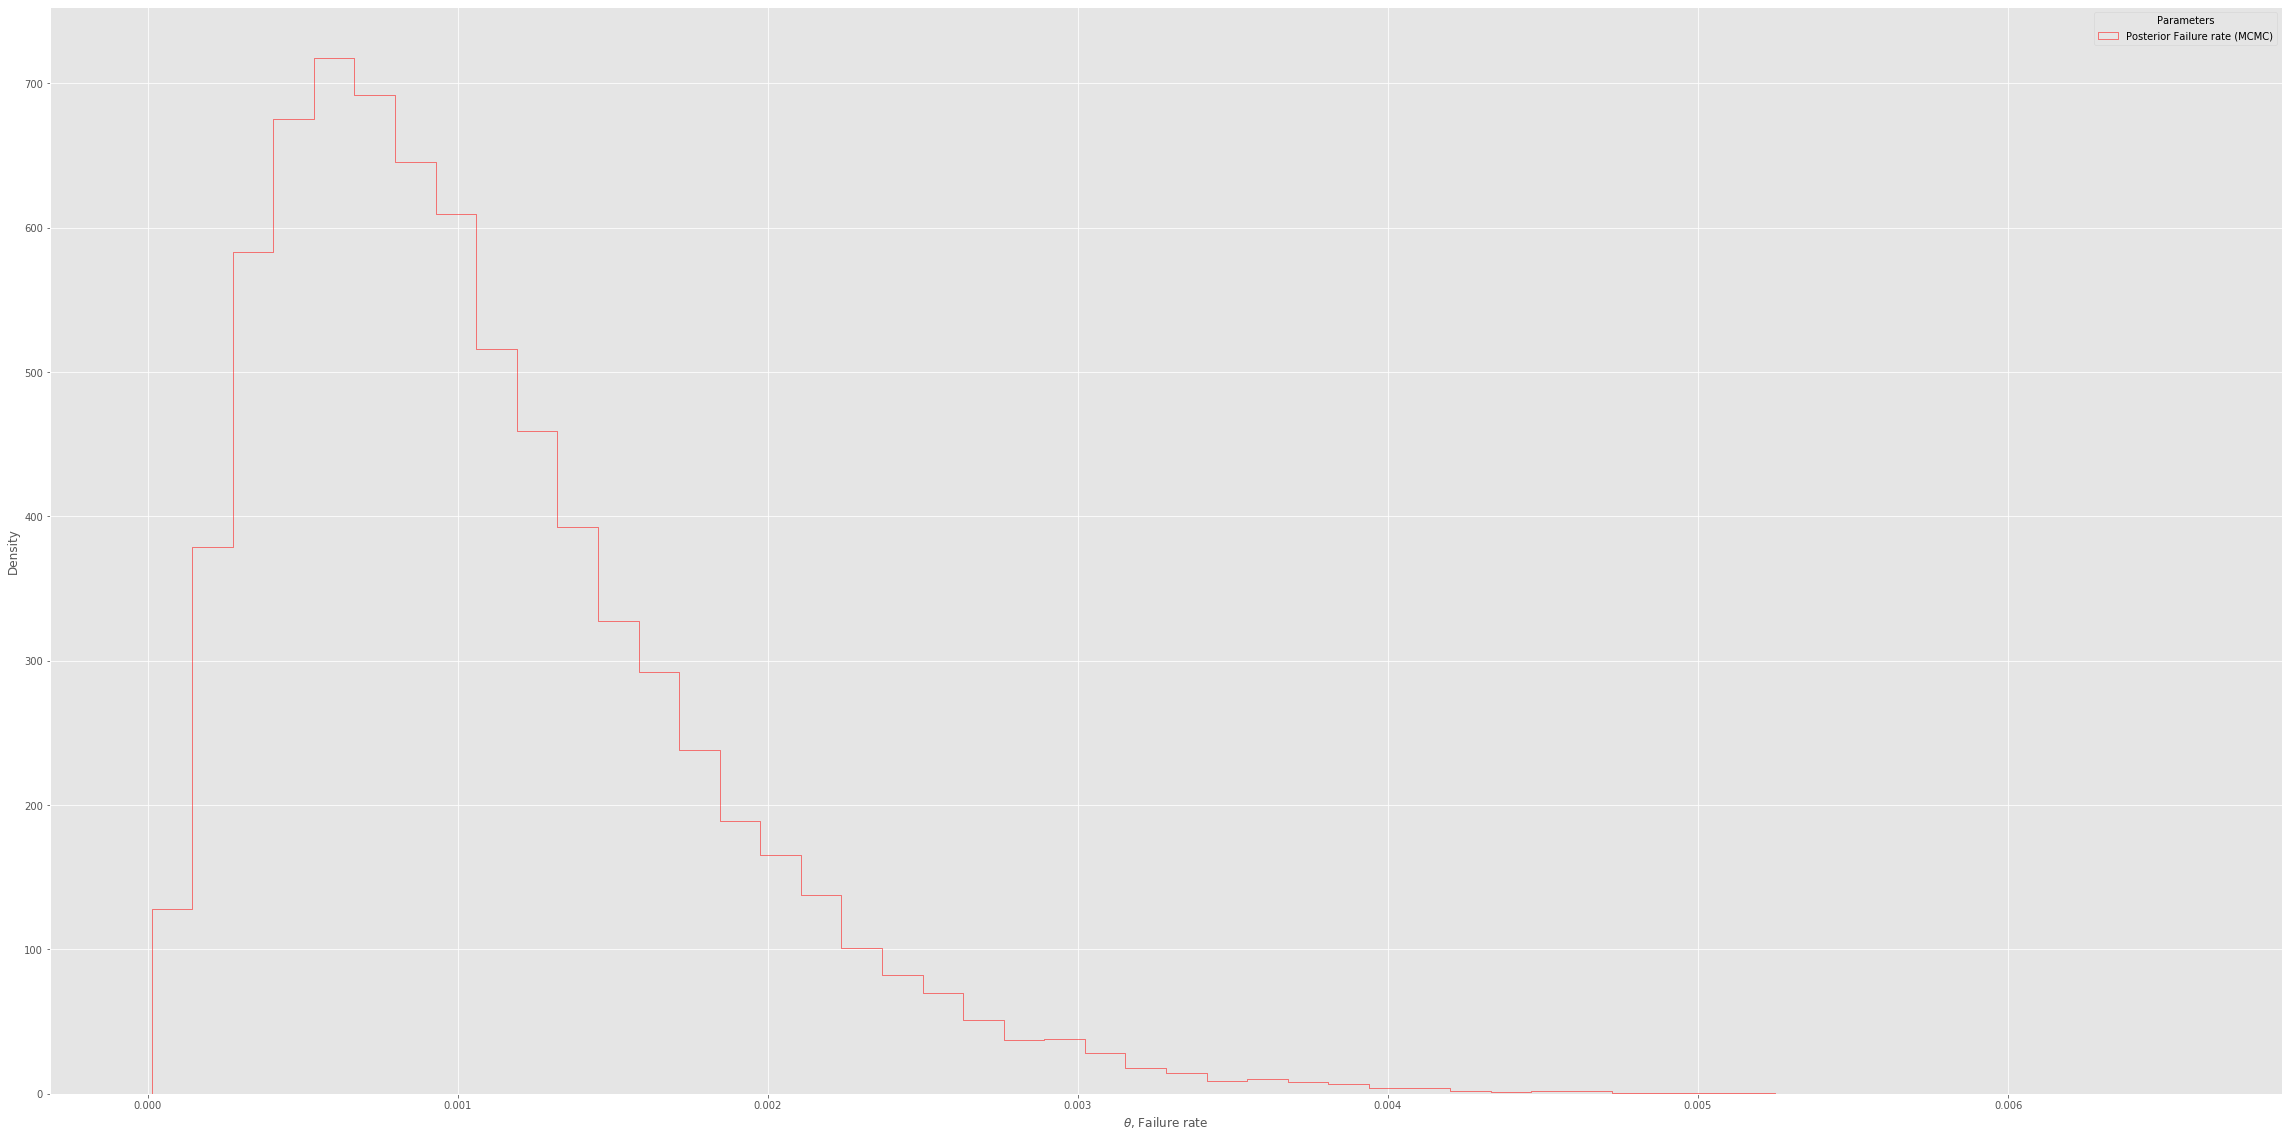

In [13]:
# Plot the posterior histogram from MCMC analysis
bins=50
plt.hist(
    trace["theta"], bins, 
    histtype="step", normed=True, 
    label="Posterior Failure rate (MCMC)", color="red"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Failure rate")
plt.ylabel("Density")
plt.show()

In [14]:
# Extract the alpha (failure rate) samples and calculate the mean T∼ Exp(λ)
alpha_samples = trace["theta"][5000:, None]
alpha_est = alpha_samples.mean()
print("mean alpha (failure rate) estimate",alpha_est)

mean alpha (failure rate) estimate 0.0010675809504605072


C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Hanan_Cohen\anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be 

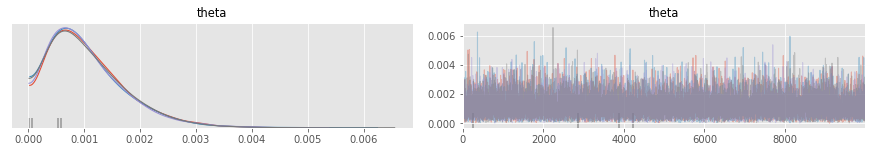

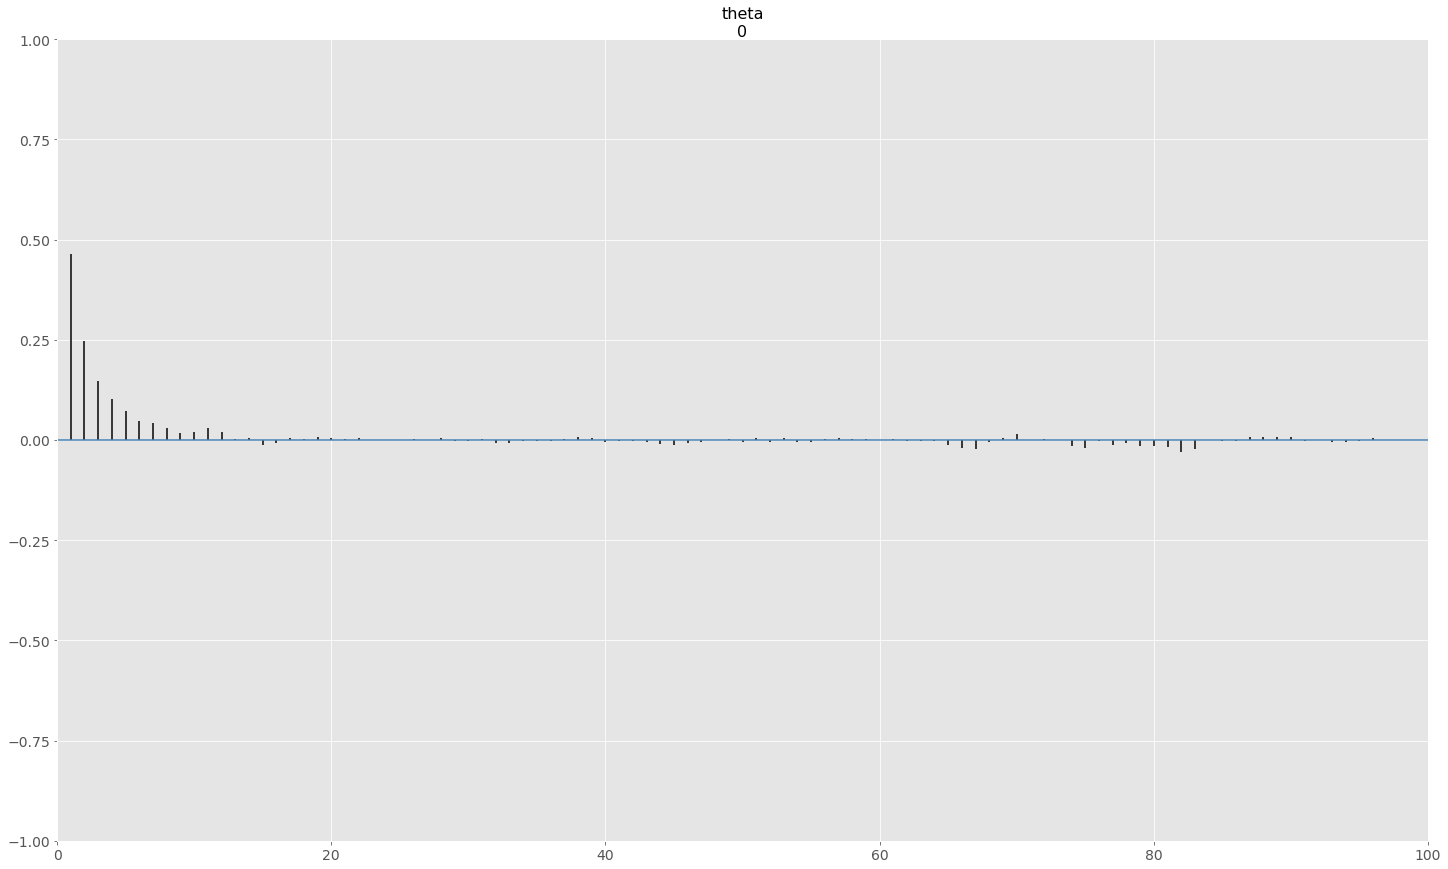

In [19]:
# Show the trace plot
figsize(20, 12)
pymc3.traceplot(trace, ['theta']);
# Show the autocorrelation plots
pymc3.autocorrplot(trace, ['theta']);